# Workbook Information:

*  This notebook creates a multi-class classification dataset using Scikit-Learn's `make_circles()` function, visualises it and builds a simple Neural Network model to classify between multiple classes.
* Decision boundaries are mapped onto the data in what the model predicts separates the classes.


In [73]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the helper_functions file
import os

if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/DavAll22/Extra-Code/main/helper_functions_TF.py
else:
  print("[INFO] 'helper_functions_TF.py' already exists, skipping download.")

--2023-06-05 12:47:40--  https://raw.githubusercontent.com/DavAll22/Machine-Learning/main/extra-code/helper_functions_TF.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12745 (12K) [text/plain]
Saving to: ‘helper_functions_TF.py.2’

helper_functions_TF 100%[===================>]  12.45K  --.-KB/s    in 0s      

2023-06-05 12:47:40 (97.1 MB/s) - ‘helper_functions_TF.py.2’ saved [12745/12745]



# Making the dataset

In [74]:
from sklearn.datasets import make_circles

# Making 2 datasets with differing ratios and combining them to create multiple classes since
# make_moons() function only creates 2 circles for binary classification

X_small, y_small = make_circles(n_samples=(250,500),
                                random_state=3, 
                                noise=0.07, 
                                factor = 0.3)
X_large, y_large = make_circles(n_samples=(250,500),
                                random_state=3, 
                                noise=0.07, 
                                factor = 0.7)
y_large[y_large==1] = 2 # change label for 3rd class

# Checking shape of arrays
print(X_small.shape, X_large.shape, y_small.shape, y_large.shape)

(750, 2) (750, 2) (750,) (750,)


In [75]:
# Stacking datasets into 1 array
X = np.vstack([X_small,X_large]) 
y = np.hstack([y_small,y_large])

# Checking shape of X and y
print(X.shape, y.shape)

(1500, 2) (1500,)


In [76]:
df = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
df.label.value_counts()

1    500
0    500
2    500
Name: label, dtype: int64

3 classes of data (0, 1, 2) with 500 elements each

In [77]:
df[:10]

,X0,X1,label
0,-0.171310,0.248856,1
1,-0.933010,0.130232,0
2,0.209318,-0.198817,1
3,-0.795791,0.536952,0
4,-0.258401,-0.287897,1
5,0.147819,-0.956716,0
6,0.062579,-0.257173,1
7,-0.261561,-0.056705,1
8,-0.261547,0.060669,1
9,0.705868,-0.737690,0


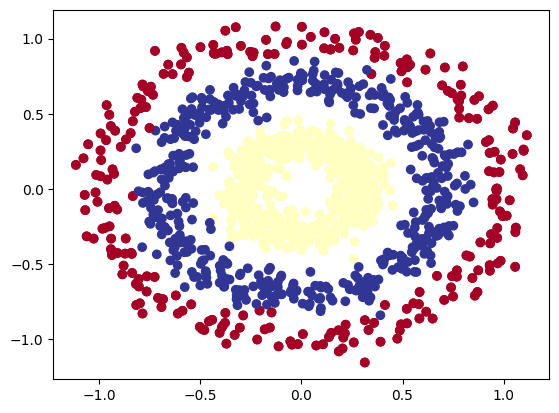

In [78]:
# Visualising the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Creating dataset splits

In [79]:
# Splitting dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Check shape after splitting
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 2), (300, 2), (1200,), (300,))

# Creating 1st model

In [80]:
# Building a simple fully connected model
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax') # 3 output classes [0, 1, 2]
])

# Compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', # labels are not one-hot encoded [0, 1, 2]
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fitting the model
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
38/38 [==============================] - 1s 9ms/step - loss: 1.1074 - accuracy: 0.3358 - val_loss: 1.0875 - val_accuracy: 0.3533
Epoch 2/50
38/38 [==============================] - 0s 4ms/step - loss: 1.0833 - accuracy: 0.3475 - val_loss: 1.0685 - val_accuracy: 0.3900
Epoch 3/50
38/38 [==============================] - 0s 4ms/step - loss: 1.0657 - accuracy: 0.4100 - val_loss: 1.0465 - val_accuracy: 0.4633
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 1.0375 - accuracy: 0.4575 - val_loss: 1.0069 - val_accuracy: 0.5833
Epoch 5/50
38/38 [==============================] - 0s 4ms/step - loss: 0.9858 - accuracy: 0.6233 - val_loss: 0.9378 - val_accuracy: 0.7433
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 0.9030 - accuracy: 0.7658 - val_loss: 0.8452 - val_accuracy: 0.7933
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 0.8029 - accuracy: 0.8292 - val_loss: 0.7400 - val_accuracy: 0.8500
Epoch 8/50
38/38 [==

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                96        
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


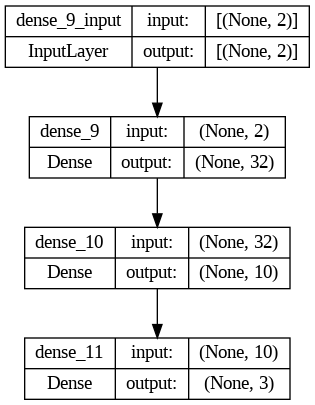

In [82]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Plotting decision boundaries

313/313 [==============================] - 1s 1ms/step
doing multiclass classification...


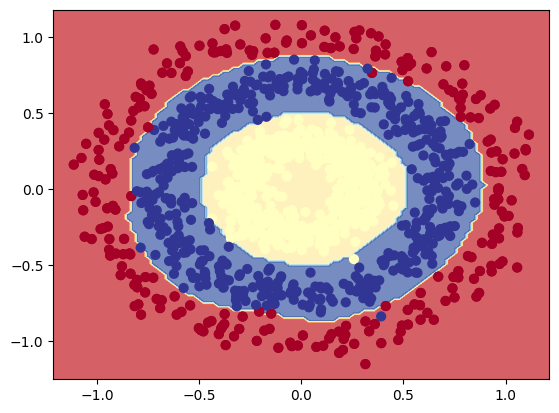

In [83]:
from helper_functions_TF import plot_decision_boundary

plot_decision_boundary(model, X, y)

# Evaluation

313/313 [==============================] - 0s 1ms/step
doing multiclass classification...
313/313 [==============================] - 0s 1ms/step
doing multiclass classification...


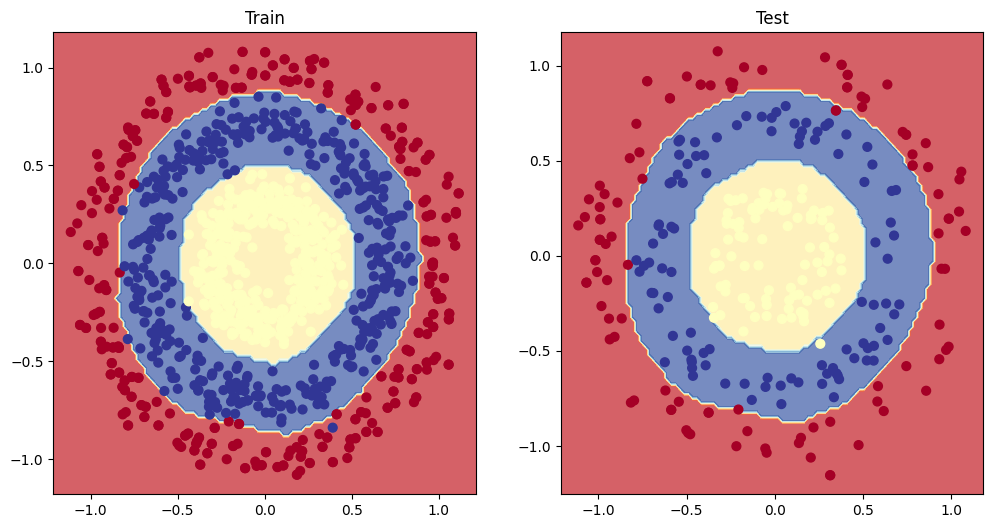

In [84]:
# Decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

In [85]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print(f'Model loss on train set: {loss_train}')
print(f'Model accuracy on train set: {100*accuracy_train:.2f}%')

38/38 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9942
Model loss on train set: 0.03303851932287216
Model accuracy on train set: 99.42%


In [86]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Model loss on test set: {loss_test}')
print(f'Model accuracy on test set: {100*accuracy_test:.2f}%')

10/10 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9833
Model loss on test set: 0.04652588069438934
Model accuracy on test set: 98.33%


Model performs well with high accuracy and low loss. These metrics change depending on how noisy the dataset generated is (decision boundaries will become harder to dicriminate between classes).

## Loss curves

Text(0.5, 1.0, 'Model Training Curves')

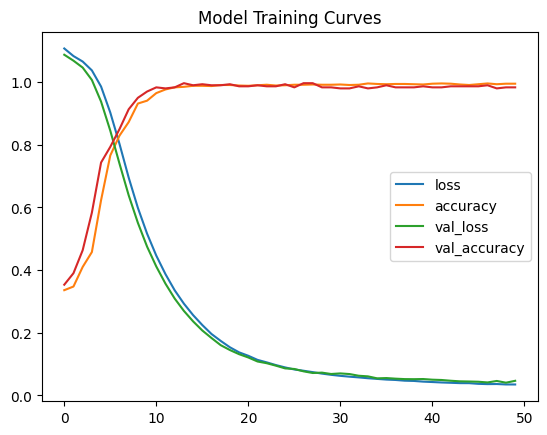

In [87]:
pd.DataFrame(history.history).plot()
plt.title('Model Training Curves')

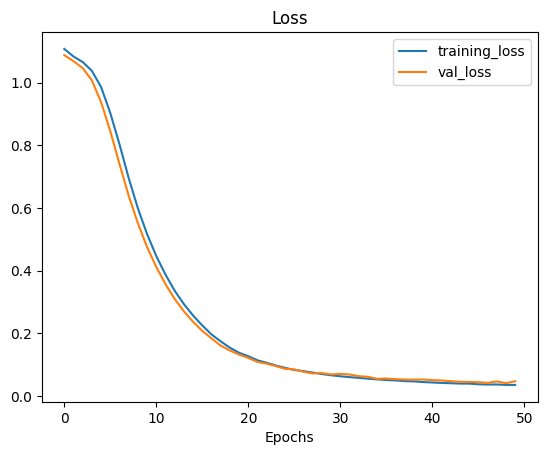

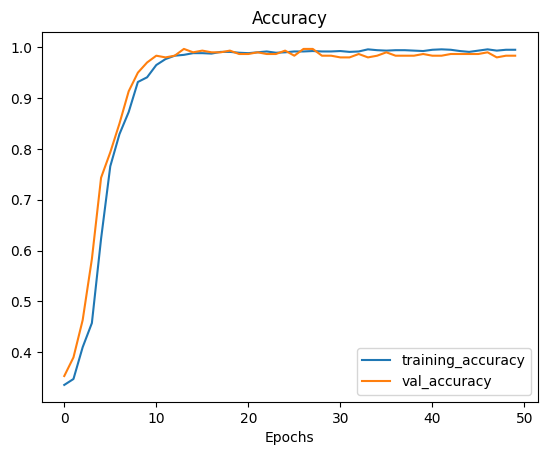

In [88]:
from helper_functions_TF import plot_loss_curves
plot_loss_curves(history)

Model has no signs of overfitting/underfitting data, validation metrics follow closely to the training metrics.

# Predictions

In [89]:
# Model predictions
# Prediction probabilities for each of the classes (we want the index with the highest value)
y_probs = model.predict(X_test)
y_probs[:10]

10/10 [==============================] - 0s 3ms/step


array([[9.3681486e-03, 1.0727378e-04, 9.9052453e-01],
       [6.8713054e-03, 6.5818051e-04, 9.9247044e-01],
       [2.9237792e-09, 9.9382585e-01, 6.1741276e-03],
       [6.6960949e-01, 4.6515513e-07, 3.3039001e-01],
       [3.0454642e-11, 9.9935752e-01, 6.4243528e-04],
       [9.9998528e-01, 1.6730009e-14, 1.4650233e-05],
       [1.5927717e-03, 7.9314495e-03, 9.9047577e-01],
       [9.9697208e-01, 5.6479443e-10, 3.0279129e-03],
       [9.7690094e-01, 2.6129545e-09, 2.3098964e-02],
       [9.9150208e-09, 9.8808330e-01, 1.1916695e-02]], dtype=float32)

Softmax creates prediction probabilities fot how likely the sample is in each class. There are 3 classes, so are 3 prediction probabilities. 
We take the highest value in the array as what the model thinks the most likely class is. The class is the index location of that probability.

In [90]:
# Getting the index position of each prediction
# Gives the class prediction
y_pred_classes = y_probs.argmax(axis=1)
y_pred_classes[:10]

array([2, 2, 1, 0, 1, 0, 2, 0, 0, 1])

In [91]:
# Ground truth
y_test[:10]

array([2, 2, 1, 0, 1, 0, 2, 0, 0, 1])

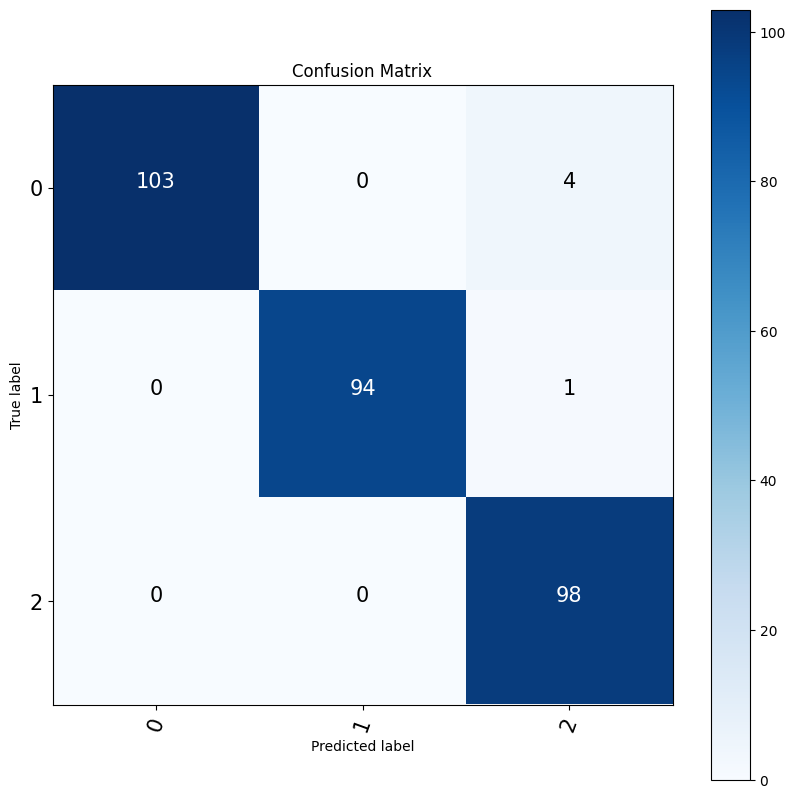

In [92]:
## Confusion matrix
from helper_functions_TF import make_confusion_matrix

make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred_classes,
                      )

In [93]:
from sklearn.metrics import classification_report
classification_report_model = classification_report(y_test, y_pred_classes)
print(classification_report_model)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       107
           1       1.00      0.99      0.99        95
           2       0.95      1.00      0.98        98

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

